In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import pandas as pd
import csv


Y_position = 4

# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = pd.read_csv("/content/sample_data/Bonds bankruptcy Data (Edited & Balance).csv")
# split into input (X) and output (Y) variables

df = dataset
print(df)
	# summary statistics
print(df.describe())

corr=df.corr(method ='pearson')
print(corr)
corr.to_csv('corr.csv')

X = dataset.iloc[:,0:Y_position]
Y = dataset.iloc[:,Y_position]
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=2020)

#scaling to around -2 to 2 (Z)
scaler = preprocessing.StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

#Model 1 : linear regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
#intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
#verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

linear_classifier = linear_model.LogisticRegression(random_state=123)
linear_classifier.fit(scaled_X_train, y_train)
y_pred_train1 = linear_classifier.predict(scaled_X_train)
cm1_train = confusion_matrix(y_train,y_pred_train1)
print("Regression")
print("================================")
print(cm1_train)
acc_train1 = (cm1_train[0,0] + cm1_train[1,1]) / sum(sum(cm1_train))
print("Regression TrainSet: Accurarcy %.2f%%" % (acc_train1*100))
print("================================")
y_pred1 = linear_classifier.predict(scaled_X_test)
cm1 = confusion_matrix(y_test,y_pred1)
print(cm1)
acc1 = (cm1[0,0] + cm1[1,1]) / sum(sum(cm1))
print("Regression Testset: Accurarcy %.2f%%" % (acc1*100))
print("================================")
print("================================")
print("================================")


#Model 2: decision tree
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
#min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
#min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(scaled_X_train, y_train)
y_pred_train2 = clf.predict(scaled_X_train)
cm2_train = confusion_matrix(y_train,y_pred_train2)
print("Decision Tree")
print("================================")
print(cm2_train)
acc_train2 = (cm2_train[0,0] + cm2_train[1,1]) / sum(sum(cm2_train))
print("Decsion Tree TrainSet: Accurarcy %.2f%%" % (acc_train2*100))
print("================================")
y_pred2 = clf.predict(scaled_X_test)
cm2 = confusion_matrix(y_test,y_pred2)
acc2 = (cm2[0,0] + cm2[1,1]) / sum(sum(cm2))
print(cm2)
print("Decision Tree Testset: Accurarcy %.2f%%" % (acc2*100))
print("================================")
print("================================")
print("================================")


#Model 3 random forest
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, 
#min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
#max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, 
#n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]

model3 = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
model3.fit(scaled_X_train, y_train)
y_predicted3 = model3.predict(scaled_X_test)

y_pred_train3 = model3.predict(scaled_X_train)
cm3_train = confusion_matrix(y_train,y_pred_train3)
print("Random Forest")
print("================================")
print(cm3_train)
acc_train3 = (cm3_train[0,0] + cm3_train[1,1]) / sum(sum(cm3_train))
print("Random Forest TrainSet: Accurarcy %.2f%%" % (acc_train3*100))
print("================================")
y_pred3 = model3.predict(scaled_X_test)
cm_test3 = confusion_matrix(y_test,y_pred3)
print(cm_test3)
acc_test3 = (cm_test3[0,0] + cm_test3[1,1]) / sum(sum(cm_test3))
print("Random Forest Testset: Accurarcy %.2f%%" % (acc_test3*100))
print("================================")
print("================================")
print("================================")

#Model 4: XGBoost

print("Xgboost")
print("================================")
#class sklearn.ensemble.GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, 
#subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, 
#verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, 
#n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)[source]
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

model4 = GradientBoostingClassifier(random_state=0)
model4.fit(scaled_X_train, y_train)
y_pred_train4 = model4.predict(scaled_X_train)
cm4_train = confusion_matrix(y_train,y_pred_train4)
print(cm4_train)
acc_train4 = (cm4_train[0,0] + cm4_train[1,1]) / sum(sum(cm4_train))
print("Xgboost TrainSet: Accurarcy %.2f%%" % (acc_train4*100))
predictions = model4.predict(scaled_X_test)
y_pred4 = (predictions > 0.5)
y_pred4 =y_pred4*1 #convert to 0,1 instead of True False
cm4 = confusion_matrix(y_test, y_pred4)
print("==================================")
print("Xgboost on testset confusion matrix")
print(cm4)
acc4 = (cm4[0,0] + cm4[1,1]) / sum(sum(cm4))
print("Xgboost on TestSet: Accuracy %.2f%%" % (acc4*100))
print("==================================")

#Model 5: neural network
#https://www.tensorflow.org/guide/keras/train_and_evaluate
model = Sequential()
model.add(Dense(10, input_dim=Y_position, activation='relu'))
#model.add(Dense(10, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
# Compile mode
# https://www.tensorflow.org/guide/keras/train_and_evaluate

model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=5, verbose=0)
# evaluate the model
scores = model.evaluate(X_train, y_train)
#print(scores)
print("Neural Network Trainset: \n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions5 = model.predict(X_test)
#print(predictions)
#print('predictions shape:', predictions.shape)

y_pred5 = (predictions5 > 0.5)
y_pred5 = y_pred5*1 #convert to 0,1 instead of True False
cm5 = confusion_matrix(y_test, y_pred5)
print("==================================")
print("==================================")
print("Neural Network on testset confusion matrix")
print(cm5)

## Get accurary from Confusion matrix
## Position 0,0 and 1,1 are the correct predictions 
acc5 = (cm5[0,0] + cm5[1,1]) / sum(sum(cm5))
print("Neural Network on TestSet: Accuracy %.2f%%" % (acc5*100))

#================== Model 6 SVM and 7 Naive Bayesian


def train_and_predict_using_model(model_name= "",model=None):
    model.fit(scaled_X_train, y_train)
    y_predicted = model3.predict(scaled_X_test)
    y_pred_train = model.predict(scaled_X_train)
    cm_train = confusion_matrix(y_train,y_pred_train)
    print(model_name)
    print("================================")
    print("Training confusion matrix: ")
    print(cm_train)
    acc_train = (cm_train[0,0] + cm_train[1,1]) / sum(sum(cm_train))
    print("TrainSet: Accurarcy %.2f%%" % (acc_train*100))
    print("================================")
    y_pred = model.predict(scaled_X_test)
    cm_test = confusion_matrix(y_test,y_pred)
    print(cm_test)
    acc_test = (cm_test[0,0] + cm_test[1,1]) / sum(sum(cm_test))
    print("Testset: Accurarcy %.2f%%" % (acc_test*100))
    print("================================")


#Model 6 SVM 
# class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, 
# tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’

from sklearn import svm

clf = svm.SVC()
train_and_predict_using_model("SVM (Classifier)", clf)

clf = svm.SVC(tol=0.0005)
train_and_predict_using_model("SVM (tol=0.0005)", clf)

clf = svm.SVC(degree=2)
train_and_predict_using_model("SVM (degree=2)", clf)


rbf_svc = svm.SVC(kernel='rbf')
train_and_predict_using_model("SVM (RBF kernel)", rbf_svc)

rbf_svc = svm.SVC(kernel='sigmoid')
train_and_predict_using_model("SVM (sigmoid)", rbf_svc)

rbf_svc = svm.SVC(kernel='linear')
train_and_predict_using_model("SVM (Linear)", rbf_svc)


# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1:2})
train_and_predict_using_model('SVM uneven class weight', wclf)

from sklearn.naive_bayes import GaussianNB

# Model 7 Naive Nayesian
# class sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

gnb = GaussianNB()
train_and_predict_using_model("Naive Bayes", gnb)




        Attr1     Attr2     Attr3     Attr4  class
0   -0.086208 -0.041815 -0.007974 -0.082415      1
1   -0.034655  0.013788  0.120081 -0.110792      1
2   -0.454512  0.009128 -1.330367 -0.313777      1
3   -1.856905  0.579749 -1.102942 -0.279015      1
4   -0.055054  0.102515 -0.435038 -0.187300      1
..        ...       ...       ...       ...    ...
594 -0.100140  0.063698 -0.062937 -0.097755      0
595 -0.022752  0.025541 -0.577176 -0.197877      0
596 -0.164790 -0.023233 -0.374772 -0.172018      0
597  0.024119 -0.084488  0.943026  0.076957      0
598 -0.073484  0.090645 -0.351960 -0.181310      0

[599 rows x 5 columns]
            Attr1       Attr2       Attr3       Attr4       class
count  599.000000  599.000000  599.000000  599.000000  599.000000
mean    -0.062829    0.029413   -0.170557   -0.061271    0.338898
std      0.235256    0.099197    1.012604    0.311390    0.473731
min     -2.247368   -0.158814   -5.986769   -0.380847    0.000000
25%     -0.120217   -0.033503   -0

## Model helper function


## Feature importance

### Feature importances with forests of trees

In [2]:
RF = model3
importances = RF.feature_importances_
std = numpy.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = numpy.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature (Column index) %s (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature (Column index) 1 (0.498745)
2. feature (Column index) 0 (0.315273)
3. feature (Column index) 3 (0.106142)
4. feature (Column index) 2 (0.079840)


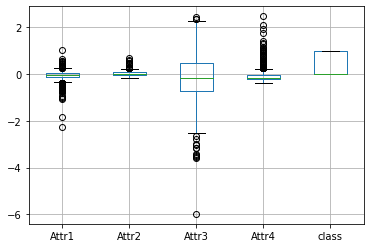

In [3]:
import seaborn as sns
import pandas as pd
boxplot = pd.DataFrame(dataset).boxplot()

## Remove outlier

In [4]:
df = pd.DataFrame(dataset)
quantile = df.iloc[:,4].quantile(0.99)
df1 = df[df.iloc[:,4] < quantile]
df.shape, df1.shape

((599, 5), (396, 5))

In [5]:
df1 = df1.dropna()

## Use top 3 features

In [6]:
TOP_N_FEATURE = 2

indices_top3 = indices[:TOP_N_FEATURE]
print(indices_top3)

# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
# split into input (X) and output (Y) variables

df = dataset
print(df)
df = pd.DataFrame(dataset)

X = dataset.iloc[:,indices_top3]
Y = dataset.iloc[:,Y_position]
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)


#scaling to around -2 to 2 (Z)
scaler = preprocessing.StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

#Model 1 : linear regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
#intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
#verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

linear_classifier = linear_model.LogisticRegression(random_state=123)
linear_classifier.fit(scaled_X_train, y_train)
y_pred_train1 = linear_classifier.predict(scaled_X_train)
cm1_train = confusion_matrix(y_train,y_pred_train1)
print("Regression")
print("================================")
print(cm1_train)
acc_train1 = (cm1_train[0,0] + cm1_train[1,1]) / sum(sum(cm1_train))
print("Regression TrainSet: Accurarcy %.2f%%" % (acc_train1*100))
print("================================")
y_pred1 = linear_classifier.predict(scaled_X_test)
cm1 = confusion_matrix(y_test,y_pred1)
print(cm1)
acc1 = (cm1[0,0] + cm1[1,1]) / sum(sum(cm1))
print("Regression Testset: Accurarcy %.2f%%" % (acc1*100))
print("================================")
print("================================")
print("================================")


#Model 2: decision tree
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
#min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
#min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(scaled_X_train, y_train)
y_pred_train2 = clf.predict(scaled_X_train)
cm2_train = confusion_matrix(y_train,y_pred_train2)
print("Decision Tree")
print("================================")
print(cm2_train)
acc_train2 = (cm2_train[0,0] + cm2_train[1,1]) / sum(sum(cm2_train))
print("Decsion Tree TrainSet: Accurarcy %.2f%%" % (acc_train2*100))
print("================================")
y_pred2 = clf.predict(scaled_X_test)
cm2 = confusion_matrix(y_test,y_pred2)
acc2 = (cm2[0,0] + cm2[1,1]) / sum(sum(cm2))
print(cm2)
print("Decision Tree Testset: Accurarcy %.2f%%" % (acc2*100))
print("================================")
print("================================")
print("================================")


#Model 3 random forest
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, 
#min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
#max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, 
#n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]

model3 = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
model3.fit(scaled_X_train, y_train)
y_predicted3 = model3.predict(scaled_X_test)

y_pred_train3 = model3.predict(scaled_X_train)
cm3_train = confusion_matrix(y_train,y_pred_train3)
print("Random Forest")
print("================================")
print(cm3_train)
acc_train3 = (cm3_train[0,0] + cm3_train[1,1]) / sum(sum(cm3_train))
print("Random Forest TrainSet: Accurarcy %.2f%%" % (acc_train3*100))
print("================================")
y_pred3 = model3.predict(scaled_X_test)
cm_test3 = confusion_matrix(y_test,y_pred3)
print(cm_test3)
acc_test3 = (cm_test3[0,0] + cm_test3[1,1]) / sum(sum(cm_test3))
print("Random Forest Testset: Accurarcy %.2f%%" % (acc_test3*100))
print("================================")
print("================================")
print("================================")

#Model 4: XGBoost

print("Xgboost")
print("================================")
#class sklearn.ensemble.GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, 
#subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, 
#verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, 
#n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)[source]
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

model4 = GradientBoostingClassifier(random_state=0)
model4.fit(scaled_X_train, y_train)
y_pred_train4 = model4.predict(scaled_X_train)
cm4_train = confusion_matrix(y_train,y_pred_train4)
print(cm4_train)
acc_train4 = (cm4_train[0,0] + cm4_train[1,1]) / sum(sum(cm4_train))
print("Xgboost TrainSet: Accurarcy %.2f%%" % (acc_train4*100))
predictions = model4.predict(scaled_X_test)
y_pred4 = (predictions > 0.5)
y_pred4 =y_pred4*1 #convert to 0,1 instead of True False
cm4 = confusion_matrix(y_test, y_pred4)
print("==================================")
print("Xgboost on testset confusion matrix")
print(cm4)
acc4 = (cm4[0,0] + cm4[1,1]) / sum(sum(cm4))
print("Xgboost on TestSet: Accuracy %.2f%%" % (acc4*100))
print("==================================")

#Model 5: neural network
#https://www.tensorflow.org/guide/keras/train_and_evaluate

model = Sequential()
model.add(Dense(10, input_dim=TOP_N_FEATURE, activation='relu'))
#model.add(Dense(10, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
# Compile mode
# https://www.tensorflow.org/guide/keras/train_and_evaluate

model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=0)
# evaluate the model
scores = model.evaluate(X_train, y_train)
#print(scores)
print("Neural Network Trainset: \n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions5 = model.predict(X_test)
#print(predictions)
#print('predictions shape:', predictions.shape)

y_pred5 = (predictions5 > 0.5)
y_pred5 = y_pred5*1 #convert to 0,1 instead of True False
cm5 = confusion_matrix(y_test, y_pred5)
print("==================================")
print("==================================")
print("Neural Network on testset confusion matrix")
print(cm5)

## Get accurary from Confusion matrix
## Position 0,0 and 1,1 are the correct predictions 
acc5 = (cm5[0,0] + cm5[1,1]) / sum(sum(cm5))
print("Neural Network on TestSet: Accuracy %.2f%%" % (acc5*100))

[1 0]
        Attr1     Attr2     Attr3     Attr4  class
0   -0.086208 -0.041815 -0.007974 -0.082415      1
1   -0.034655  0.013788  0.120081 -0.110792      1
2   -0.454512  0.009128 -1.330367 -0.313777      1
3   -1.856905  0.579749 -1.102942 -0.279015      1
4   -0.055054  0.102515 -0.435038 -0.187300      1
..        ...       ...       ...       ...    ...
594 -0.100140  0.063698 -0.062937 -0.097755      0
595 -0.022752  0.025541 -0.577176 -0.197877      0
596 -0.164790 -0.023233 -0.374772 -0.172018      0
597  0.024119 -0.084488  0.943026  0.076957      0
598 -0.073484  0.090645 -0.351960 -0.181310      0

[599 rows x 5 columns]
Regression
[[283  32]
 [119  45]]
Regression TrainSet: Accurarcy 68.48%
[[69 12]
 [26 13]]
Regression Testset: Accurarcy 68.33%
Decision Tree
[[315   0]
 [  0 164]]
Decsion Tree TrainSet: Accurarcy 100.00%
[[60 21]
 [28 11]]
Decision Tree Testset: Accurarcy 59.17%
Random Forest
[[275  40]
 [ 87  77]]
Random Forest TrainSet: Accurarcy 73.49%
[[65 16]
 [21 1